In [1]:
import pandas as pd
import numpy as np
#Método de clasificación KNN (vecino más cercano)
from sklearn.neighbors import KNeighborsClassifier
#Método de clasifiación DecisionTree (árbol de decision)
from sklearn.tree import DecisionTreeClassifier
#Uso de gráficas y representación de datos
import matplotlib.pyplot as plt


In [2]:
#Lectura de Dataset haciendo uso de URL de github y el nombre de las columnas
def readDataset(file,columns):
  dataset=pd.read_csv(file, header=None, names=columns)
  return dataset

In [3]:
from sklearn.model_selection import train_test_split
#Metrics like accuracy_score or confusion matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
#Modelos a utilizar en esta práctica
tree=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=5)

In [5]:
#Compute accuracy of model
def accuracyDataset(features, label, model): 
  accuracy=0
  #Split into random train and test subsets
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
  #Entrenamiento de datos de entrenamiento
  model.fit(X_train,y_train)
  #Predice salidas de los datos test
  y_pred = model.predict(X_test)
  #Calcula precisión del modelo
  accuracy = metrics.accuracy_score(y_test, y_pred)
  return accuracy

In [6]:
def accuracyStandarizeDataset(dataset,features,label,model,n):
     precision =0
     #Split into random train and test subsets
     X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
     # Standardize the data
     scaler = StandardScaler()
     scaler.fit(X_train)
     X_train = scaler.transform(X_train)
     X_test = scaler.transform(X_test)
     # Aplicamos PCA de n dimensiones
     pca=PCA(n_components=n)
     pca.fit(X_train)
     # Fit and transform data 2D
     X_train = pca.fit_transform(X_train)
     X_test = pca.transform(X_test)
     #Volvemos a realizar la función de accuracyDataset
     # Entrenamos el modelo
     model.fit(X_train,y_train)
     # Predicciones del modelo
     y_pred = model.predict(X_test)
     # Calculamos la precision del modelo
     precision = metrics.accuracy_score(y_test,y_pred)
     return precision

In [9]:
def accuracyGraphic(datasets, first_accuracy, second_accuracy, first_model, second_model):
  plt.plot(datasets, first_accuracy, label=first_model+'_accuracy')
  plt.plot(datasets, second_accuracy, label=second_model+'_accuracy')
  plt.xlabel('Datasets')
  plt.ylabel('Accuracy')
  plt.title(first_model+'vs'+second_model)
  plt.legend()
  plt.show()

In [10]:
def errorGraphic(datasets, first_error, second_error, first_model, second_model):
  plt.plot(datasets, first_error, label=first_model+'_error')
  plt.plot(datasets, second_error, label=second_model+'_error')
  plt.xlabel('Datasets')
  plt.ylabel('Error')
  plt.title(first_model+'vs'+second_model)
  plt.legend()
  plt.show()

In [11]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, features, label):
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(confusion_matrix(y_test,y_pred))

### **1. Obtenga 5 ejemplos de ficheros de datos en formato CSV, ARFF u otro cualquiera de Weka datasets, UCI MLR**


**Dataset Iris:** conjunto de datos que contiene tres clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris. Una clase es linealmente separable de las otras 2, pero las dos últimas no son linealmente separables entre sí

In [12]:
#Iris Data set
columnas=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']
iris_features=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/iris.data', columnas)
iris_X= iris[iris_features]
iris_y= iris['class']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Dataset Car**

In [13]:
#Car Evaluation Data set
columnas=['buying','maint','doors', 'persons', 'lug_boot','safety','class']
car_features=['buying','maint','doors', 'persons', 'lug_boot','safety']
car= readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/car.data',columnas)
car['buying']=car['buying'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['maint']=car['maint'].map({'vhigh':4, 'high':3, 'med':2, 'low':1})
car['lug_boot']=car['lug_boot'].map({'small':1, 'med':2, 'big':3})
car['safety']=car['safety'].map({'low':1, 'med':2, 'high':3})
car['doors']=car['doors'].map({'1':1, '2':2,'3':3,'4':4,'5more':7}) #Esto hará que 7 signifique más de 5 puertas o personas
car['persons']=car['persons'].map({'1':1, '2':2,'3':3,'4':4,'more':7})
car_X=car[car_features]
car_y=car['class']
car

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,7,7,2,2,good
1724,1,1,7,7,2,3,vgood
1725,1,1,7,7,3,1,unacc
1726,1,1,7,7,3,2,good


**Dataset Wine:** using chemical analysis determine the origin of wines

In [14]:
#Wine Data Set
columnas= ['class','alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine_features=['alcohol', 'malic acid', 'ash', 'alcalinityOfAsh', 'Magnesium',' Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280',' Proline'] 
wine=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/wine.data',columnas)
wine_X=wine[wine_features]
wine_y=wine['class']
wine.head()

,class,alcohol,malic acid,ash,alcalinityOfAsh,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Dataset diabetes:**

In [15]:
#Diabetes Data Set
columnas=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age','Class']
diabetes_features=['Times Pregnant','Glucose tolerance','Blood pressure','Triceps skin fold','Insulin','Body mass','Diabetes pedigree', 'Age']
diabetes=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/diabetes.data',columnas)
diabetes_X=diabetes[diabetes_features]
diabetes_y=diabetes['Class']
diabetes.head()


,Times Pregnant,Glucose tolerance,Blood pressure,Triceps skin fold,Insulin,Body mass,Diabetes pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


**Dataset glass:**

In [16]:
#Glass Data set
columnas=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type']
glass_features=['RI','Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe']
glass=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/glass.data',columnas)
glass_X=glass[glass_features]
glass_y=glass['Type']
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


**Dataset Breast Cancer Wisconsin**

In [17]:
#Breast Cancer Wisconsin (Diagnostic) Data set
columnas=['id', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
cancer_features=['id', 'Clump Thickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
cancer=readDataset('https://raw.githubusercontent.com/victoriapl01/Mineria_De_Datos/main/Datasets/breast-cancer-wisconsin.data', columnas)
cancer_X=cancer[cancer_features]
cancer_y= cancer['Class']
cancer.head()

,id,Clump Thickness,Cell Size,Cell Shape,Marginal Adhesion,Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


###**2. Evalúe el árbol de decisión y el vecino más cercano sobre los datos originales**###

Para evaluar los distintos modelos, vamos a hacer uso de la métrica de precisión (accuracy), para ello entrenaremos los modelos con los diferentes datasets para posteriormente calcular la precisión de cada modelo en cada uno de los datasets. 


In [18]:
accuracy=[]
accuracy_tree=[]
accuracy_knn=[]

In [19]:
#Dataset iris
accuracy.append('iris')
accuracy_tree.append(accuracyDataset(iris_X,iris_y,tree))
accuracy_knn.append(accuracyDataset(iris_X, iris_y, knn))

In [21]:
#Dataset car
accuracy.append('car')
accuracy_tree.append(accuracyDataset(car_X,car_y,tree))
accuracy_knn.append(accuracyDataset( car_X, car_y, knn))

In [22]:
#Dataset wine
accuracy.append('wine')
accuracy_tree.append(accuracyDataset(wine_X, wine_y, tree))
accuracy_knn.append(accuracyDataset(wine_X, wine_y, knn))

In [23]:
#Dataset diabetes
accuracy.append('diabetes')
accuracy_tree.append(accuracyDataset(diabetes_X, diabetes_y, tree))
accuracy_knn.append(accuracyDataset(diabetes_X, diabetes_y, knn))

In [24]:
#Dataset glass
accuracy.append('glass')
accuracy_tree.append(accuracyDataset(glass_X, glass_y, tree))
accuracy_knn.append(accuracyDataset(glass_X, glass_y, knn))

In [25]:
#Dataset cancer
accuracy.append('cancer')
accuracy_tree.append(accuracyDataset(cancer_X,cancer_y,tree))
accuracy_knn.append(accuracyDataset(cancer_X,cancer_y,knn))

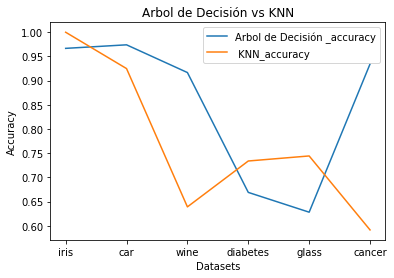

In [26]:
accuracyGraphic(accuracy, accuracy_tree, accuracy_knn, "Arbol de Decisión ", " KNN")

In [27]:
print('Iris Dataset')
confusionMatrix(tree,iris_X,iris_y)
print(' ')
confusionMatrix(knn,iris_X,iris_y)

Iris Dataset
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [28]:
print('Car Dataset')
confusionMatrix(tree, car_X, car_y)
print(' ')
confusionMatrix(knn, car_X, car_y)

Car Dataset
[[ 57   0   1   1]
 [  0  13   1   0]
 [  4   0 256   0]
 [  0   1   0  12]]
 
[[ 53   0   6   0]
 [ 10   4   0   0]
 [  4   0 256   0]
 [  4   2   0   7]]


In [29]:
print('Wine Dataset')
confusionMatrix(tree,wine_X,wine_y)
print(' ')
confusionMatrix(knn,wine_X,wine_y)

Wine Dataset
[[13  1  0]
 [ 1 12  0]
 [ 0  1  8]]
 
[[12  0  2]
 [ 1  9  3]
 [ 0  7  2]]


In [30]:
print('Diabetes Dataset')
confusionMatrix(tree,diabetes_X,diabetes_y)
print(' ')
confusionMatrix(knn,diabetes_X,diabetes_y)

Diabetes Dataset
[[77 22]
 [26 29]]
 
[[82 17]
 [24 31]]


In [31]:
print('Cancer Dataset')
confusionMatrix(tree,cancer_X,cancer_y)
print(' ')
confusionMatrix(knn,cancer_X,cancer_y)

Cancer Dataset
[[88  2]
 [ 6 41]]
 
[[71 19]
 [37 10]]


In [32]:
print('Glass dataset')
confusionMatrix(tree,glass_X,glass_y)
print(' ')
confusionMatrix(knn,glass_X,glass_y)


Glass dataset
[[ 5  2  3  0  0  0]
 [ 6 14  0  0  1  1]
 [ 1  1  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  4  1]
 [ 1  0  0  0  0  0]]
 
[[ 8  1  1  0  0  0]
 [ 6 15  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0  1]]


###**3. Estudie el efecto de la normalización (reescalar en el intervalo[0,1] y la estandarización((μ = 0, σ = 1) sobre el error de clasifiación usando el árbol de decisión y el vecino más cercano. Comente los resultados**###


NORMALIZACIÓN [0,1]

In [33]:
from sklearn import preprocessing
error=[]
error_tree=[] 
error_knn=[]

In [34]:
#Dataset Iris
error.append('iris')
iris_XN = preprocessing.normalize(iris_X)
error_tree.append(1-accuracyDataset(iris_XN,iris_y,tree))
error_knn.append(1-accuracyDataset(iris_XN, iris_y, knn))

In [35]:
#Dataset Car
error.append('car')
car_XN = preprocessing.normalize(car_X)
error_tree.append(1-accuracyDataset(car_XN,car_y,tree))
error_knn.append(1-accuracyDataset(car_XN,car_y,knn))

In [36]:
#Dataset wine
error.append('wine')
wine_XN = preprocessing.normalize(wine_X)
error_tree.append(1-accuracyDataset(wine_XN,wine_y,tree))
error_knn.append(1-accuracyDataset(wine_XN,wine_y,knn))

In [37]:
#Dataset diabetes
error.append('diabetes')
diabetes_XN = preprocessing.normalize(diabetes_X)
error_tree.append(1-accuracyDataset(diabetes_XN,diabetes_y,tree))
error_knn.append(1-accuracyDataset(diabetes_XN,diabetes_y,knn))

In [38]:
#Dataset glass
error.append('glass')
glass_XN = preprocessing.normalize(glass_X)
error_tree.append(1-accuracyDataset(glass_XN,glass_y,tree))
error_knn.append(1-accuracyDataset(glass_XN,glass_y,knn))

In [39]:
#Dataset cancer
error.append('cancer')
cancer_XN = preprocessing.normalize(cancer_X)
error_tree.append(1-accuracyDataset(cancer_XN,cancer_y,tree))
error_knn.append(1-accuracyDataset(cancer_XN,cancer_y,knn))

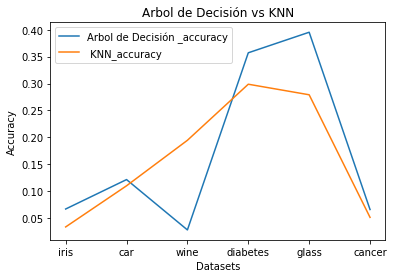

In [40]:
accuracyGraphic(error, error_tree, error_knn, "Arbol de Decisión ", " KNN")

###**4. Estudie el efecto del análisis en componentes principales sobre el árbol de decisión y el vecino más cercano. Comente lo resultados. Estudie el efecto según el número de componentes retenidas.**###

In [41]:
from sklearn.model_selection import GridSearchCV
def comp_principalesKNN (data_X, data_y):
  accuracy_knn=[]
  knn=KNeighborsClassifier(n_neighbors=5)
  accuracy_knn.append(accuracyDataset( data_X, data_y, knn))
  k_range = list(range(1, 51))
  param_grid = dict(n_neighbors=k_range)
    
  # defining parameter range
  grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
    
  # fitting the model for grid search
  grid_search=grid.fit(data_X, data_y)
  print ('Mejor componente principal',grid_search.best_params_)
  knn= KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
  accuracy_knn.append(accuracyDataset( data_X, data_y, knn))

  return accuracy_knn

In [42]:
iris_accuracyKNN=comp_principalesKNN(iris_X, iris_y)
iris_accuracyKNN

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mejor componente principal {'n_neighbors': 13}


[1.0, 0.9666666666666667]

In [43]:
car_accuracyKNN=comp_principalesKNN(car_X, car_y)
car_accuracyKNN

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mejor componente principal {'n_neighbors': 9}


[0.9248554913294798, 0.9248554913294798]

In [44]:
wine_accuracyKNN=comp_principalesKNN(wine_X,wine_y)
wine_accuracyKNN

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mejor componente principal {'n_neighbors': 1}


[0.6388888888888888, 0.75]

In [45]:
diabetes_accuracyKNN=comp_principalesKNN(diabetes_X,diabetes_y)
diabetes_accuracyKNN

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mejor componente principal {'n_neighbors': 17}


[0.7337662337662337, 0.7857142857142857]

In [46]:
glass_accuracyKNN=comp_principalesKNN(glass_X,glass_y)
glass_accuracyKNN

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Mejor componente principal {'n_neighbors': 1}


[0.7441860465116279, 0.813953488372093]

In [47]:
cancer_accuracyKNN=comp_principalesKNN(cancer_X,cancer_y)
cancer_accuracyKNN

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Mejor componente principal {'n_neighbors': 46}


[0.5912408759124088, 0.6788321167883211]

In [48]:
def comp_principalesDTree(data_X, data_y):
  accuracy_DTree=[]
  param_dict = {
  "criterion":['gini','entropy'],
  "max_depth":range(1,10),
  "min_samples_split":range(2,10),
  "min_samples_leaf":range(1,5)
  }
  tree_clas = DecisionTreeClassifier()
  accuracy_DTree.append(accuracyDataset(data_X,data_y, tree_clas))
  grid = GridSearchCV(estimator=tree_clas, param_grid=param_dict, cv=5, verbose=True)
  grid_search= grid.fit(data_X, data_y)
  print('Mejores componentes principales: ', grid_search.best_params_)

  tree=DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], 
                              min_samples_leaf=grid_search.best_params_['min_samples_leaf'], min_samples_split=grid_search.best_params_['min_samples_split'])
  accuracy_DTree.append(accuracyDataset(data_X,data_y, tree))
  return accuracy_DTree

In [49]:
iris_accuracyDTree=comp_principalesDTree(iris_X,iris_y)
iris_accuracyDTree

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores componentes principales:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


[0.9666666666666667, 0.9666666666666667]

In [50]:
car_accuracyDTree=comp_principalesDTree(car_X, car_y)
car_accuracyDTree

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores componentes principales:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}


[0.976878612716763, 0.9566473988439307]

In [51]:
wine_accuracyDTree=comp_principalesDTree(wine_X,wine_y)
wine_accuracyDTree

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores componentes principales:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}


[0.8888888888888888, 0.9444444444444444]

In [52]:
diabetes_accuracyDTree=comp_principalesDTree(diabetes_X,diabetes_y)
diabetes_accuracyDTree

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores componentes principales:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


[0.6818181818181818, 0.7402597402597403]

In [53]:
glass_accuracyDTree=comp_principalesDTree(glass_X,glass_y)
glass_accuracyDTree

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores componentes principales:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}


[0.6744186046511628, 0.7209302325581395]

In [54]:
cancer_accuracyDTree=comp_principalesDTree(cancer_X,cancer_y)
cancer_accuracyDTree

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Mejores componentes principales:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}


[0.9197080291970803, 0.9854014598540146]

###**5. Estudie el efecto del muestreo aleatorio del 10% de las  instancias sin reemplazamiento  sobre el árbol de decisión y el vecino más cercano. Comente lo resultados. Compare los resultados con un muestreo del mismo porcentaje pero estratificado**###

In [64]:
def muestreoAleatorio( features, label, model):
  accuracy=0
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=1)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  return accuracy

In [65]:
accuracy=[]
accuracy_tree=[]
accuracy_knn=[]

In [66]:
#Dataset iris
accuracy.append('iris')
accuracy_tree.append(muestreoAleatorio(iris_X,iris_y,tree))
accuracy_knn.append(muestreoAleatorio(iris_X, iris_y, knn))

In [67]:
#Dataset car
accuracy.append('car')
accuracy_tree.append(muestreoAleatorio(car_X,car_y,tree))
accuracy_knn.append(muestreoAleatorio( car_X, car_y, knn))

In [68]:
#Dataset wine
accuracy.append('wine')
accuracy_tree.append(muestreoAleatorio(wine_X, wine_y, tree))
accuracy_knn.append(muestreoAleatorio(wine_X, wine_y, knn))

In [69]:
#Dataset diabetes
accuracy.append('diabetes')
accuracy_tree.append(muestreoAleatorio(diabetes_X, diabetes_y, tree))
accuracy_knn.append(muestreoAleatorio(diabetes_X, diabetes_y, knn))

In [70]:
#Dataset glass
accuracy.append('glass')
accuracy_tree.append(muestreoAleatorio(glass_X, glass_y, tree))
accuracy_knn.append(muestreoAleatorio(glass_X, glass_y, knn))

In [71]:
#Dataset cancer
accuracy.append('cancer')
accuracy_tree.append(muestreoAleatorio(cancer_X,cancer_y,tree))
accuracy_knn.append(muestreoAleatorio(cancer_X,cancer_y,knn))

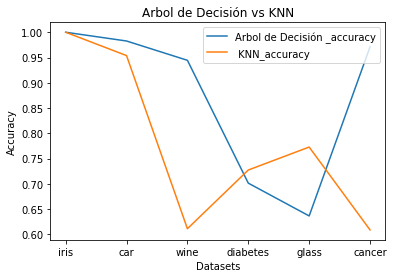

In [72]:
accuracyGraphic(accuracy, accuracy_tree, accuracy_knn, "Arbol de Decisión ", " KNN")

In [76]:
def muestreoEstratificado(features, label, model):
  accuracy=0
  X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=1, stratify=label)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  return accuracy

In [77]:
accuracy=[]
accuracy_tree=[]
accuracy_knn=[]

In [78]:
#Dataset iris
accuracy.append('iris')
accuracy_tree.append(muestreoEstratificado(iris_X,iris_y,tree))
accuracy_knn.append(muestreoEstratificado(iris_X, iris_y, knn))

In [79]:
#Dataset car
accuracy.append('car')
accuracy_tree.append(muestreoEstratificado(car_X,car_y,tree))
accuracy_knn.append(muestreoEstratificado( car_X, car_y, knn))

In [80]:
#Dataset wine
accuracy.append('wine')
accuracy_tree.append(muestreoEstratificado(wine_X, wine_y, tree))
accuracy_knn.append(muestreoEstratificado(wine_X, wine_y, knn))

In [81]:
#Dataset diabetes
accuracy.append('diabetes')
accuracy_tree.append(muestreoEstratificado(diabetes_X, diabetes_y, tree))
accuracy_knn.append(muestreoEstratificado(diabetes_X, diabetes_y, knn))

In [82]:
#Dataset glass
accuracy.append('glass')
accuracy_tree.append(muestreoEstratificado(glass_X, glass_y, tree))
accuracy_knn.append(muestreoEstratificado(glass_X, glass_y, knn))

In [83]:
#Dataset cancer
accuracy.append('cancer')
accuracy_tree.append(muestreoEstratificado(cancer_X,cancer_y,tree))
accuracy_knn.append(muestreoEstratificado(cancer_X,cancer_y,knn))

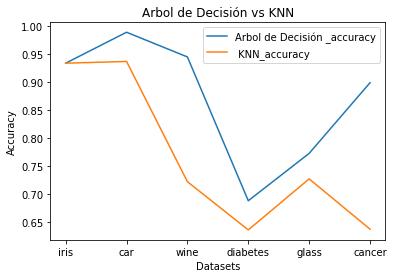

In [84]:
accuracyGraphic(accuracy, accuracy_tree, accuracy_knn, "Arbol de Decisión ", " KNN")

###**6. Valores perdidos. Existen diferentes métodos para imputar valores perdidos en la biblioteca scikit learn (https://scikit-learn.org/stable/modules/impute.html ). Seleccione un conjunto de datos con valores perdidos y dos métodos de imputación. Estudie el efecto de los métodos de imputación sobre los dos clasificadores**###